# We align everything now!!!

assuming 20 filter, 100 all images (6 classes, 3 visualisation images each = 18 img choice)

-> we need all images here!!!

Input:
* activation maps = 2000 = 100*20
* msks (layer) = 100
* disease csv (manual) = 1
* gradcam = 100

Output:

Output for each image choice:
* gradcam + layers = 360 = 3*6*20

Output for each image choice * filter:
* activation maps + layers = 360 = 3*6*20

Output for each filter:
* CSV with image stats = 20
* Boxplot = 20
* radar = 20

In [60]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


the_dir = "examples/example_results/lightning_logs/debug_octmnist_no_fc/version_14/"

tmp_path = os.path.join(the_dir, "final_plots")
os.makedirs(tmp_path, exist_ok=True)


In [61]:
def get_region():
    # mateos code
    pass

def get_texture_stats():
    # image stats
    pass


In [62]:
def log_csv():
    # Define your lists
    img_id = [10001] # i can only use the id, cause we don't need the path anymore from here
    label = ["amd"]
    area = []
    stat_texture1 = []
    
    # rows = len(img) * len(area) = 1000 * 6
    

    # Creating a DataFrame with dummy data
    data = {
        'img_id': [10, 15, 14, 20, 18, 22, 30, 28, 32, 35, 33, 34, 40, 38, 42, 45, 43, 44],
        'area': ['A', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'B'],
        'Disease label': ['Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1',
                    'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2',
                    'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3'],
        'stat_texture1': [10, 15, 14, 20, 18, 22, 30, 28, 32, 35, 33, 34, 40, 38, 42, 45, 43, 44]
    }

    df = pd.DataFrame(data)
    # df.to_csv("output.csv", index=False)  # Saving to CSV

    # Save DataFrame to CSV
    df.to_csv(os.path.join(tmp_path, 'filter_12_0_3.csv'), index=False)
    
    pass

def plot_boxplot():
    
    print(sns.color_palette("Paired"))

    pal = sns.color_palette("Paired")
    pal.pop(4)
    pal.pop(4)
    pal.insert(0, pal[6]) 
    pal.insert(1, pal[8]) 
    sns.set_theme(style="ticks", palette=pal)


    # Read the DataFrame from CSV
    df = pd.read_csv(os.path.join(tmp_path, 'filter_12_0_3.csv'))
    filter_id = ("filter_12_0_3.csv".split("_", 1)[1]).split(".")[0]

    
    # Create a boxplot with hue
    plt.figure(figsize=(14, 7))
    # or boxplot ...
    #sns.catplot(x='Layer', y='Percentage', hue='Disease', data=df, kind="violin", bw_adjust=.5, cut=0, height=3, aspect=6)
    sns.boxplot(x='area', y='stat_texture1', hue='Disease label', data=df)

    sns.despine(offset=10, trim=True)

    # Set y-axis limits and labels
    plt.ylim(0, 100)
    plt.ylabel('Texture')
    plt.xlabel('Retinal layer')

    # Display the legend
    #plt.legend(title='Disease', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Display the plot
    plt.title(f'Boxplot of activations in filter {filter_id} by retinal layer and disease')
    plt.savefig(os.path.join(tmp_path, f'filter_{filter_id}.png'))


def plot_radar():
    pass

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725), (0.12156862745098039, 0.47058823529411764, 0.7058823529411765), (0.6980392156862745, 0.8745098039215686, 0.5411764705882353), (0.2, 0.6274509803921569, 0.17254901960784313), (0.984313725490196, 0.6039215686274509, 0.6), (0.8901960784313725, 0.10196078431372549, 0.10980392156862745), (0.9921568627450981, 0.7490196078431373, 0.43529411764705883), (1.0, 0.4980392156862745, 0.0), (0.792156862745098, 0.6980392156862745, 0.8392156862745098), (0.41568627450980394, 0.23921568627450981, 0.6039215686274509), (1.0, 1.0, 0.6), (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]


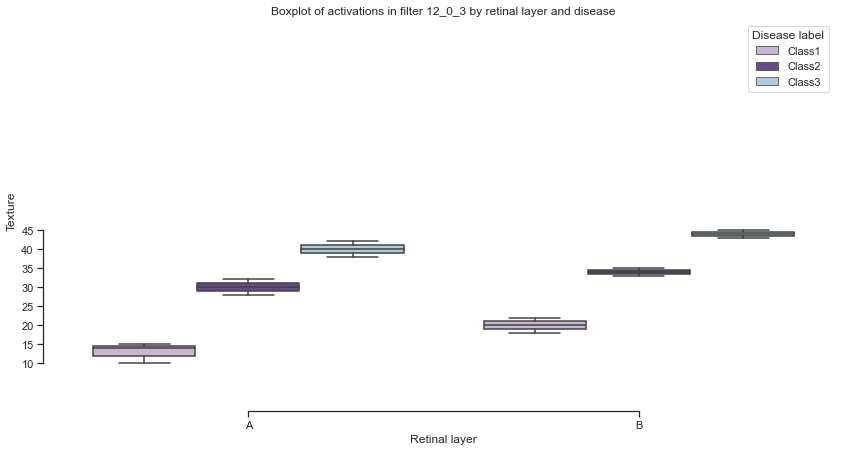

In [63]:
log_csv()

plot_boxplot()

In [73]:
df = pd.read_csv(os.path.join(the_dir, "all_filters.csv"))
filter_id_list = df["filter"]

import glob
from skimage import io

for f_id in filter_id_list:
    print(f_id.split("_",1)[1])
    # get activation maps from this filter
    f_position = f_id.split("_",1)[1]
    files = glob.glob(the_dir + f"/activation_maps/*_{f_position}.png")
    for f in files:
        print(f)
        # open file
        image = io.imread(f)
        
        # get mask by _id*N*_
        # get region
        
        # get stats of region
        
    break
    

10_10_1
examples/example_results/lightning_logs/debug_octmnist_no_fc/version_14//activation_maps\hid_id0_10_10_1.png
examples/example_results/lightning_logs/debug_octmnist_no_fc/version_14//activation_maps\hid_id1_10_10_1.png
examples/example_results/lightning_logs/debug_octmnist_no_fc/version_14//activation_maps\hid_id2_10_10_1.png
examples/example_results/lightning_logs/debug_octmnist_no_fc/version_14//activation_maps\hid_id3_10_10_1.png
examples/example_results/lightning_logs/debug_octmnist_no_fc/version_14//activation_maps\hid_id4_10_10_1.png
examples/example_results/lightning_logs/debug_octmnist_no_fc/version_14//activation_maps\hid_id5_10_10_1.png
examples/example_results/lightning_logs/debug_octmnist_no_fc/version_14//activation_maps\hid_id6_10_10_1.png
examples/example_results/lightning_logs/debug_octmnist_no_fc/version_14//activation_maps\hid_id7_10_10_1.png


In [65]:
filters

,source,target,target_group,importance
0,0_0,10_10,decent1,0.713937
1,0_0,1_6,decent1,0.702664
2,0_0,2_1,decent1,0.475362
3,0_0,13_11,decent1,0.683441
4,10_10,10_5,decent2,0.305995
...,...,...,...,...
154,1_11,2_7,decent1x1,0.249350
155,11_16,2_7,decent1x1,0.214352
156,12_0,2_7,decent1x1,0.155532
157,6_2,2_7,decent1x1,0.140896


In [66]:
for i in range(18): # -> i need all masks from octa 500 not just 3 per class
    # open msk_choice 
    pass


    for i in range(360/18): #-> i need all masks from octa 500 not just 3 per class
        # open activation_maps 
        # save acctivation_maps_with_msk
        pass


    for i in range(18/18): # we can remove the loop i guess
        # open gradcam
        # save gradcam_with_msk
        pass

# open disease csv

TypeError: 'float' object cannot be interpreted as an integer

# Stats
We use texture features

* Mean Intensity
* Standard Deviation
* Entropy
* Contrast (from Gray Level Co-occurrence Matrix)
* Energy (from Gray Level Co-occurrence Matrix)
* Homogeneity (from Gray Level Co-occurrence Matrix)
* Fractal Dimension
* Texture Entropy
* Local Binary Pattern (mean or variance of the histogram)
* Histogram of Oriented Gradients (mean magnitude of gradients)

In [ ]:
# save csv with image stats
for img in range(360):
    # create dataframe
    for layer in range(7): # 7 layers (6 boundaries) - but the uppermost is ignored so ... hmmm, also ignore lower 3 px row for mnist
        # get image stats (only one will be used finally)
        # new line in dataframe
        # class, img_name, layer (region), stats
    # save csv

In [ ]:
# save boxplots
for file in range(20):
    # open csv
    # we only use one image stat for now!!
    # create boxplot
    # save

In [ ]:
# save radar

for file in range(20):
    # idk align boxplot somehow with the disease_manual.csv
    # save radar